## Linear regression

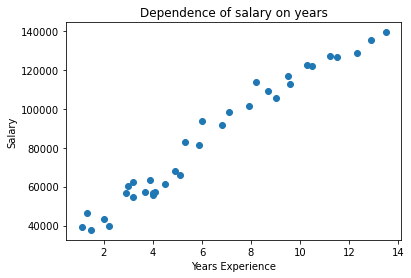

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

salary_dataset = pd.read_csv('datasets/Salary.csv', sep=',')
years = salary_dataset['YearsExperience'].values.reshape(salary_dataset['YearsExperience'].shape[0], 1)
salary = salary_dataset['Salary'].values.reshape(salary_dataset['Salary'].shape[0], 1)

plt.scatter(years, salary)
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Dependence of salary on years')
plt.show()

#### Data structure

In [2]:
print(years.shape)
print(salary.shape)

(35, 1)
(35, 1)


In [3]:
salary_dataset.describe()

,YearsExperience,Age,Salary
count,35.000000,35.000000,35.000000
mean,6.308571,28.371429,83888.428571
std,3.618610,5.568217,32200.112889
min,1.100000,20.000000,37731.000000
25%,3.450000,24.000000,57019.000000
50%,5.300000,27.000000,81363.000000
75%,9.250000,32.500000,113223.500000
max,13.500000,40.000000,139465.000000


Linear regression formula:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 = \beta_{0} + \beta_{1}  YearsExperience
\end{equation}

#### Initialization of $\beta$ factor

In [4]:
from random import random

beta0 = random()
beta1 = random()

alpha = 0.1

print(beta0)
print(beta1)
print(alpha)

0.5596456854335911
0.8570773813090495
0.1


#### Calculating prediction

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1
\end{equation}

In [5]:
import numpy as np

def calc_predictions(beta_0, beta_1, X):
    return beta_0 + beta_1 * X

predictions = calc_predictions(beta0, beta1, years)

print(predictions)

[[ 1.5024308 ]
 [ 1.67384628]
 [ 1.84526176]
 [ 2.27380045]
 [ 2.44521592]
 [ 3.04517009]
 [ 3.13087783]
 [ 3.30229331]
 [ 3.30229331]
 [ 3.730832  ]
 [ 3.90224747]
 [ 3.98795521]
 [ 3.98795521]
 [ 4.07366295]
 [ 4.4164939 ]
 [ 4.75932485]
 [ 4.93074033]
 [ 5.10215581]
 [ 5.61640224]
 [ 5.70210997]
 [ 6.38777188]
 [ 6.64489509]
 [ 7.330557  ]
 [ 7.58768021]
 [ 8.0162189 ]
 [ 8.27334212]
 [ 8.70188081]
 [ 8.78758855]
 [ 9.38754271]
 [ 9.55895819]
 [10.15891236]
 [10.41603557]
 [11.10169748]
 [11.6159439 ]
 [12.13019033]]


In [6]:
print(predictions.size)

35


#### Error calculation

\begin{equation}
    SSR = \frac{1}{2m} \sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2
\end{equation}

In [7]:
def calc_ssr(y_pred, y):
    ssr_sum = 0.0
    for yn_pred, yn in zip(y_pred, y):
        ssr_sum += (yn_pred - yn)**2
    ssr = ssr_sum / (2 * y.size)
    return ssr

In [8]:
ssr_error = calc_ssr(predictions, salary)

print(ssr_error)

[4.0216499e+09]


#### Calculating gradient

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{0}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})
\end{equation}

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{1}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

In [9]:
def calc_gradient(x, y, y_pred):
    beta0_grad_sum = 0.0
    beta1_grad_sum = 0.0
    for xn, yn, yn_pred in zip(x, y, y_pred):
        beta0_grad_sum += (yn_pred - yn)
        beta1_grad_sum += (yn_pred - yn) * xn
    return beta0_grad_sum / y.size, beta1_grad_sum / y.size, 

In [10]:
beta0_grad, beta1_grad = calc_gradient(years, salary, predictions)
print(beta0_grad, beta1_grad)

[-83882.46199186] [-640417.46577186]


####  Updating weights

\begin{equation}
    \beta_{0} = \beta_{0} - \alpha \frac{\partial SSR}{\partial \beta_{0}} 
\end{equation}

\begin{equation}
    \beta_{1} = \beta_{1} - \alpha \frac{\partial SSR}{\partial \beta_{1}} 
\end{equation}

In [11]:
def update_weights(alpha, beta, beta_gradient):
    return beta - alpha * beta_gradient

In [12]:
beta0 = update_weights(alpha, beta0, beta0_grad) 
beta1 = update_weights(alpha, beta1, beta1_grad)

print(beta0)
print(beta1)

[8388.80584487]
[64042.60365457]


#### Final algorithm version

[4.02179018e+09]
[9.61190369e+08]
[2.92788736e+08]
[1.46558023e+08]
[1.14308428e+08]
[1.06940222e+08]
[1.05004697e+08]
[1.04256578e+08]
[1.037692e+08]
[1.03340281e+08]
[1.02925662e+08]
[1.02515695e+08]
[1.02108266e+08]
[1.01702909e+08]
[1.01299512e+08]
[1.00898045e+08]
[1.00498494e+08]
[1.00100849e+08]
[99705100.90580487]
[99311239.88683374]


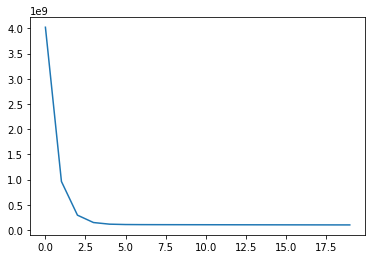

In [13]:
def learn_and_fit(x, y):
    b0 = []
    b1 = []
    error = []
    epochs = 20
    
    beta_0 = 0.85
    beta_1 = 0.6
    alpha = 0.01
    
    b0.append(beta_0)
    b1.append(beta_1)
    
    for i in range (epochs):
        pred = calc_predictions(beta_0, beta_1, x)
        ssr_error = calc_ssr(pred, y)
        print(ssr_error)
        grad_beta_0, grad_beta_1 = calc_gradient(x, y, pred)
        beta_0 = update_weights(alpha, beta_0, grad_beta_0)
        beta_1 = update_weights(alpha, beta_1, grad_beta_1)
        b0.append(beta_0)
        b1.append(beta_1)
        error.append(ssr_error)
    return b0, b1, error

b0, b1, error = learn_and_fit(years, salary)
plt.plot(error)

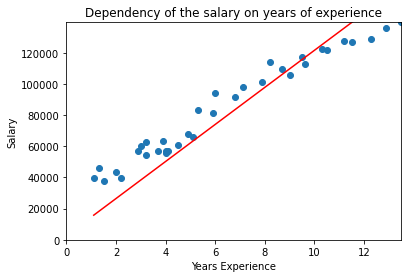

In [14]:
from matplotlib import animation, rc

figure = plt.figure()
plt.scatter(years, salary)
regression, = plt.plot(np.array([]), np.array([]), color='red')
plt.xlim(0, np.max(years))
plt.ylim(0, np.max(salary))
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Dependency of the salary on years of experience')

def animate(i):
    regression.set_ydata(b0[i] + (b1[i] * years))
    regression.set_xdata(years)
    return regression

animated = animation.FuncAnimation(figure, animate, frames=len(b0), interval=100)

rc('animation', html='jshtml')
animated

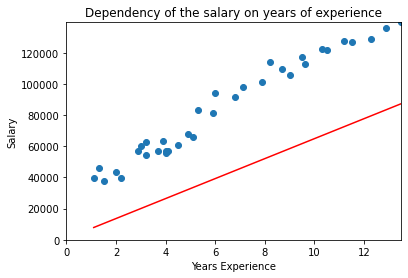

In [15]:
##First epoch
figure = plt.figure()
plt.scatter(years, salary)
regression, = plt.plot(np.array([]), np.array([]), color='red')
regression.set_ydata(b0[1] + (b1[1] * years))
regression.set_xdata(years)
plt.xlim(0, np.max(years))
plt.ylim(0, np.max(salary))
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Dependency of the salary on years of experience')
plt.show()

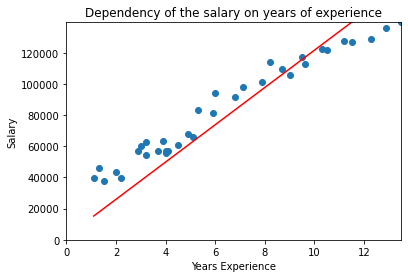

In [16]:
##Middle epoch
figure = plt.figure()
plt.scatter(years, salary)
regression, = plt.plot(np.array([]), np.array([]), color='red')
regression.set_ydata(b0[10] + (b1[10] * years))
regression.set_xdata(years)
plt.xlim(0, np.max(years))
plt.ylim(0, np.max(salary))
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Dependency of the salary on years of experience')
plt.show()

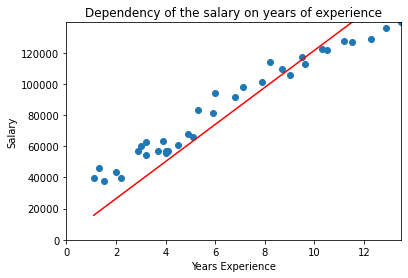

In [17]:
##Last epoch
figure = plt.figure()
plt.scatter(years, salary)
regression, = plt.plot(np.array([]), np.array([]), color='red')
regression.set_ydata(b0[19] + (b1[19] * years))
regression.set_xdata(years)
plt.xlim(0, np.max(years))
plt.ylim(0, np.max(salary))
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Dependency of the salary on years of experience')
plt.show()

### Testy jednostkowe

In [18]:
import unittest
import pandas as pd

class SimpleLinearRegressionTest(unittest.TestCase):
    
    def test_learn_and_fit(self):
        df = pd.read_csv('datasets/Salary.csv', sep=',')
        x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
        y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
        
        b0, b1, error = learn_and_fit(x, y)
        
        self.assertTrue(len(b0) > 1)
        self.assertTrue(len(b1) > 1)
        self.assertTrue(len(b0) == len(b1))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:]))) #Sprawdzenie, czy błędy nie rosną
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_learn_and_fit (__main__.SimpleLinearRegressionTest) ... 

[4.02179018e+09]
[9.61190369e+08]
[2.92788736e+08]
[1.46558023e+08]
[1.14308428e+08]
[1.06940222e+08]
[1.05004697e+08]
[1.04256578e+08]
[1.037692e+08]
[1.03340281e+08]
[1.02925662e+08]
[1.02515695e+08]
[1.02108266e+08]
[1.01702909e+08]
[1.01299512e+08]
[1.00898045e+08]
[1.00498494e+08]
[1.00100849e+08]
[99705100.90580487]
[99311239.88683374]


ok

----------------------------------------------------------------------
Ran 1 test in 0.017s

OK
